# Import

In [1]:
import cv2 as cv
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from sklearn.model_selection import train_test_split
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
from tensorflow.keras.models import load_model
import time

# Preprocessing

In [46]:
train_path="./train"
test_path="./test"

In [47]:
os.makedirs(train_path,exist_ok=True)
os.makedirs(test_path,exist_ok=True)

In [48]:
total_paths=[]
paths=[os.path.join("cropped_images",x)for x in os.listdir("cropped_images")]
for path in paths:
    total_paths.extend([os.path.join(path,x)for x in os.listdir(path)])


In [49]:
train_paths,test_paths=train_test_split(total_paths,test_size=0.1,random_state=100)

In [50]:
for path in train_paths:
    image_name=os.path.split(os.path.split(path)[0]    )[1]
    folder_name="train/"+image_name
    os.makedirs(folder_name,exist_ok=True)
    shutil.copy(path,folder_name)
for path in test_paths:
    image_name=os.path.split(os.path.split(path)[0]    )[1]
    folder_name="test/"+image_name
    os.makedirs(folder_name,exist_ok=True)
    shutil.copy(path,folder_name)
    

In [51]:
len(os.listdir("./train"))

10

In [52]:
len(os.listdir("./test"))

10

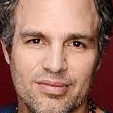

In [53]:
load_img("cropped_images/mark_ruffalo/mark_ruffalo1.png")

In [54]:
training_generator=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,rotation_range=7,shear_range=0.2)

In [10]:
testing_generator=ImageDataGenerator(rescale=1./255)

In [56]:
training_set=training_generator.flow_from_directory("train",shuffle=True,batch_size=8,target_size=(160,160),class_mode="categorical")

Found 453 images belonging to 10 classes.


In [11]:
testing_set=testing_generator.flow_from_directory("test",shuffle=False,batch_size=1,target_size=(160,160),class_mode="categorical")

Found 51 images belonging to 10 classes.


# Network

In [ ]:
network=Sequential()
network.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(160,160,3),activation="relu"))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu"))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Flatten())
network.add(Dense(units=1000,activation="relu"))
network.add(Dense(units=512,activation="relu"))
network.add(Dense(units=10,activation="softmax"))

In [59]:
network.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 158, 158, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 79, 79, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 77, 77, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 38, 38, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 46208)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1000)           │    46,209,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       512,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,736,786 (178.29 MB)

 Trainable params: 46,736,786 (178.29 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
network.compile(loss="categorical_crossentropy", metrics=["accuracy"],optimizer="Adam")

In [61]:
history=network.fit(training_set,epochs=20)

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 59s 921ms/step - accuracy: 0.1349 - loss: 3.8931
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 48s 848ms/step - accuracy: 0.2577 - loss: 2.1017
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 49s 862ms/step - accuracy: 0.3974 - loss: 1.5693
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 52s 911ms/step - accuracy: 0.5427 - loss: 1.2978
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 49s 846ms/step - accuracy: 0.6466 - loss: 1.0252
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 47s 820ms/step - accuracy: 0.6594 - loss: 0.9659
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 47s 828ms/step - accuracy: 0.6543 - loss: 1.0361
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 80s 793ms/step - accuracy: 0.7235 - loss: 0.7270
Epoch 9/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 45s 791ms/step - accuracy: 0.7071 - loss: 0.8447
Epoch 10/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 45s 786ms/step - accuracy: 0.7671 - loss: 0.6607
Epoch 11/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 47s 815ms/step - accuracy: 0.7777 - loss: 0.6079
Epoch 12/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 46

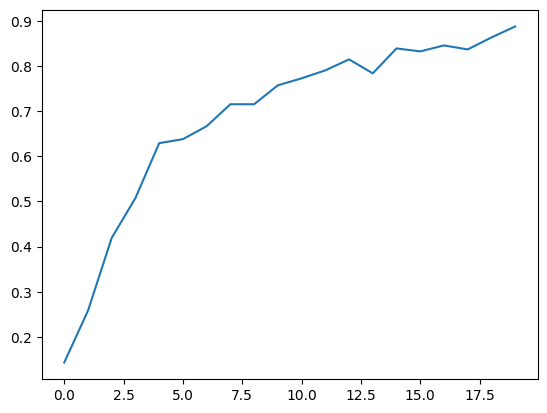

In [62]:
plt.plot(history.history['accuracy'])

In [63]:
prediction=network.predict(testing_set)

51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step


In [ ]:
prediction

In [65]:
prediction=np.argmax(prediction,axis=1)
prediction

array([0, 3, 9, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 4, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 6, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 7, 5, 9, 9, 9,
       9, 9, 9, 9, 9, 1, 9], dtype=int64)

In [66]:
actual=testing_set.classes
actual

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9])

In [ ]:
accuracy_score(actual,prediction)

In [68]:
cm=confusion_matrix(actual,prediction)

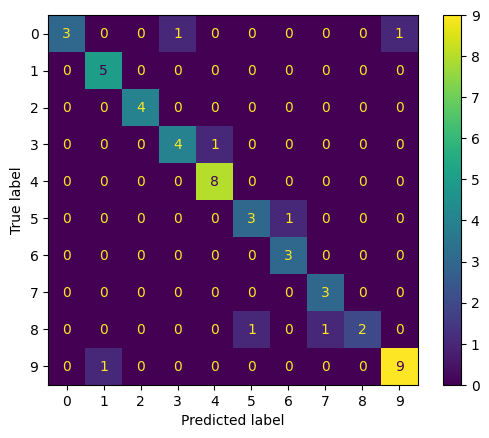

In [69]:
dis=ConfusionMatrixDisplay(cm)
dis.plot()

In [ ]:
network.save("face_reco.h5")

In [2]:
network2=load_model("face_reco.h5")

In [93]:
network2.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 158, 158, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 79, 79, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 77, 77, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 38, 38, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 46208)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1000)           │    46,209,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 512)            │       512,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 46,736,788 (178.29 MB)

 Trainable params: 46,736,786 (178.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [3]:
network2.compile(loss="categorical_crossentropy", metrics=["accuracy"],optimizer="Adam")

In [4]:
def image_preprocessing(image):
    testing_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    testing_image=cv.resize(testing_image,(160,160))
    testing_image=testing_image/255
    testing_image=testing_image.reshape(-1,160,160,3)
    return testing_image

In [86]:
image=cv.imread("testing/3d5be60ea1c0157dbeb745d9adf4921f.jpg")
testing_image=image_preprocessing(image)

In [87]:
testing_image.shape

(1, 160, 160, 3)

In [88]:
image_prediction=network2.predict(testing_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


In [78]:
prediction=np.argmax(image_prediction,axis=1)

In [89]:
prediction

array([3], dtype=int64)

In [13]:
class_labels = {v: k for k, v in testing_set.class_indices.items()}
class_labels

{0: 'Charlize Theron',
 1: 'Elizabeth Olsen',
 2: 'Henry Cavill',
 3: 'Priyanka Chopra',
 4: 'Tom Cruise',
 5: 'chris_evans',
 6: 'chris_hemsworth',
 7: 'mark_ruffalo',
 8: 'robert_downey_jr',
 9: 'scarlett_johansson'}

In [ ]:
video=cv.VideoCapture("video.mkv")
face_detector=cv.CascadeClassifier("haarcascade_frontalface_default.xml")

In [ ]:
while True:
    ok,frame=video.read()
    if not ok:
        break
    start_time=time.time()
    gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    face_detection=face_detector.detectMultiScale(gray_frame,scaleFactor=1.1,minSize=(100,100),minNeighbors=20)
    if(len(face_detection)!=0):
        for (x,y,w,h) in face_detection:
            new_image = frame[y:y+h, x:x+w]
            testing_image=image_preprocessing(new_image)
            prediction=network2.predict(testing_image)
            name=class_labels[np.argmax(prediction[0])]
            cv.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)
            cv.putText(frame, name, (x + w // 2, y + h // 2), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
        cv.imshow("Frame",frame)
    end_time=time.time()
    total_time=end_time-start_time 
    print(total_time)   
    # Press 'q' to quit
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
# Release resources
video.release()
cv.destroyAllWindows()